In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In the IMDB dataset, movie reviews are labeled with both positive and negative sentiment.

Each review is converted into a set of word embeddings as part of the dataset's preparation, where each word is represented by a fixed-size vector.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

custom-trained embedding layer with training sample size = 100

In [3]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 819ms/step - acc: 0.4906 - loss: 0.6932 - val_acc: 0.5500 - val_loss: 0.6891
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8469 - loss: 0.6666 - val_acc: 0.5000 - val_loss: 0.6890
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9539 - loss: 0.6467 - val_acc: 0.5500 - val_loss: 0.6892
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9555 - loss: 0.6288 - val_acc: 0.5500 - val_loss: 0.6890
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9758 - loss: 0.6123 - val_acc: 0.6000 - val_loss: 0.6887
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9641 - loss: 0.5978 - val_acc: 0.6000 - val_loss: 0.6890
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9820 - loss: 0.5818 - val_acc: 0.6000 - val_loss: 0.6898
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9758 - loss: 0.5608 - val_acc: 0.6000 - val_loss: 0.6901
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9719 - loss: 0.5420 -

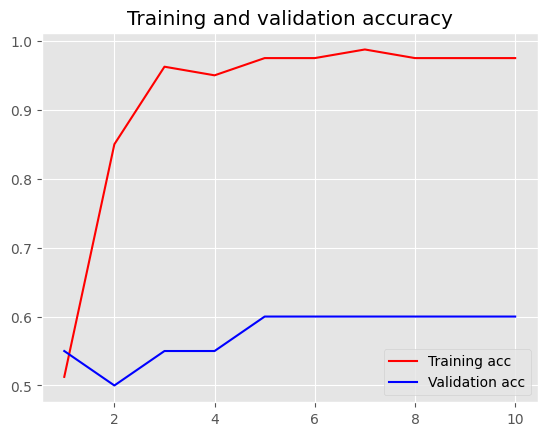

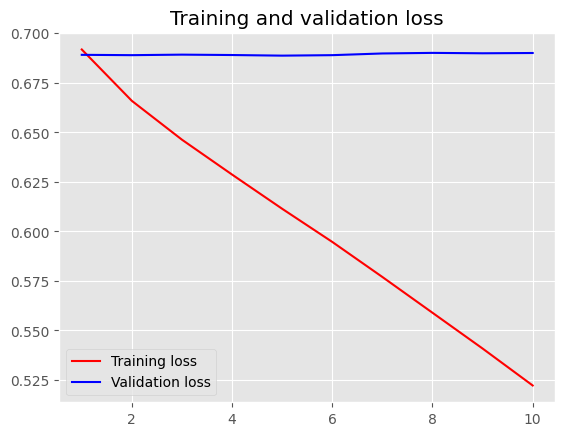

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5033 - loss: 0.6951
Test loss: 0.6954377293586731
Test accuracy: 0.4984799921512604


In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.5009 - loss: 0.6931 - val_acc: 0.5640 - val_loss: 0.6890
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7105 - loss: 0.6728 - val_acc: 0.6690 - val_loss: 0.6741
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8538 - loss: 0.6262 - val_acc: 0.7120 - val_loss: 0.6260
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8669 - loss: 0.5383 - val_acc: 0.7720 - val_loss: 0.5602
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9050 - loss: 0.4205 - val_acc: 0.7850 - val_loss: 0.4962
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9208 - loss: 0.3332 - val_acc: 0.8050 - val_loss: 0.4519
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9459 - loss: 0.2622 - val_acc: 0.8180 - val_loss: 0.4264
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9619 - loss: 0.1989 - val_acc: 0.8180 - val_loss: 0.4155
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

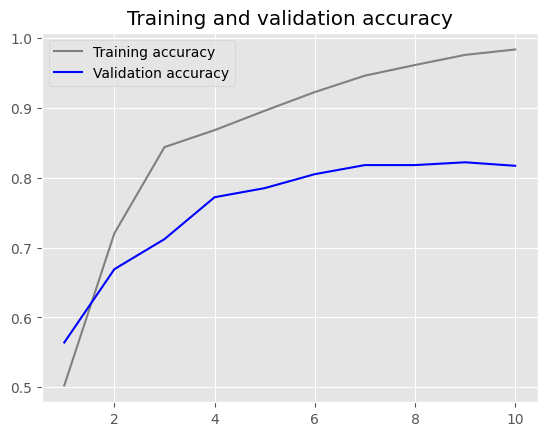

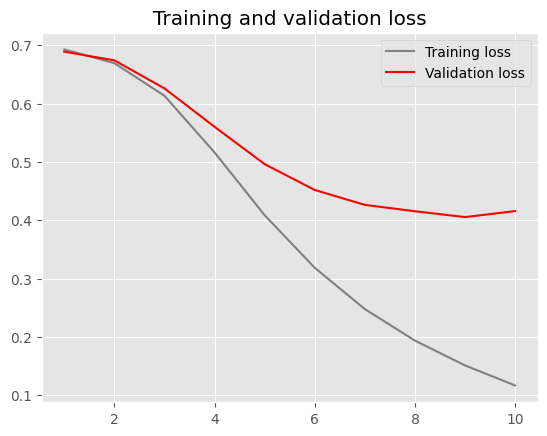

In [8]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8165 - loss: 0.3976
Test loss: 0.4010636806488037
Test accuracy: 0.8143600225448608


custom-trained embedding layer with training sample size = 1000

In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.5072 - loss: 0.6927 - val_acc: 0.5700 - val_loss: 0.6909
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7905 - loss: 0.6756 - val_acc: 0.5700 - val_loss: 0.6896
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8764 - loss: 0.6561 - val_acc: 0.5650 - val_loss: 0.6878
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9398 - loss: 0.6356 - val_acc: 0.6000 - val_loss: 0.6854
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9420 - loss: 0.6118 - val_acc: 0.6100 - val_loss: 0.6821
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9635 - loss: 0.5745 - val_acc: 0.6200 - val_loss: 0.6782
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9590 - loss: 0.5370 - val_acc: 0.6200 - val_loss: 0.6739
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9583 - loss: 0.4953 - val_acc: 0.6200 - val_loss: 0.6690
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9633 - loss:

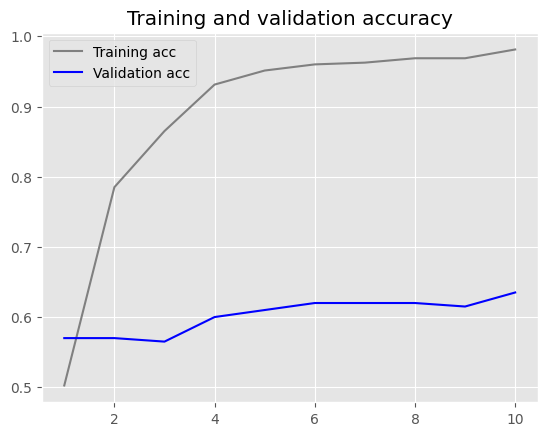

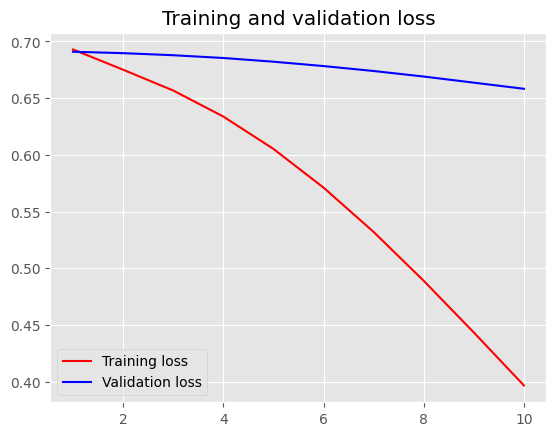

In [12]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5695 - loss: 0.6787
Test loss: 0.6795464158058167
Test accuracy: 0.5651999711990356


custom-trained embedding layer with training sample size = 10000

In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5359 - loss: 0.6906 - val_acc: 0.7140 - val_loss: 0.6552
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7708 - loss: 0.5978 - val_acc: 0.8165 - val_loss: 0.4688
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8535 - loss: 0.4144 - val_acc: 0.8475 - val_loss: 0.3719
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8943 - loss: 0.3012 - val_acc: 0.8600 - val_loss: 0.3378
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9116 - loss: 0.2498 - val_acc: 0.8640 - val_loss: 0.3232
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9343 - loss: 0.1976 - val_acc: 0.8655 - val_loss: 0.3156
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9481 - loss: 0.1698 - val_acc: 0.8660 - val_loss: 0.3186
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9580 - loss: 0.1441 - val_acc: 0.8590 - val_loss: 0.3285
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

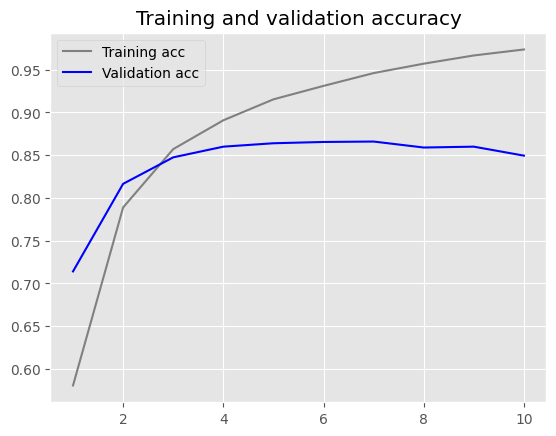

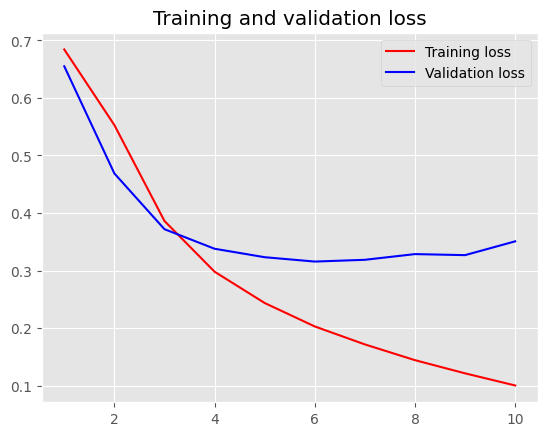

In [16]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8445 - loss: 0.3632
Test loss: 0.3561384677886963
Test accuracy: 0.848800003528595


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  1007k      0  0:01:21  0:01:21 --:--:--  803k


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Making Use of Trained Word Embeds Pretrained word embeddings can be used if there is insufficient training data to obtain word embeddings along with the problem you want to tackle.


Tokenizing the data

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150  # Cut off review after 150 words
train_data = 100  # Training sample 100
valid_data = 10000  # Validation sample 10000
words = 10000  # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


We trained the 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.



Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [22]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension based on matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size based on matrix

# Define the model with an Embedding layer initialized with the embedding matrix
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False  # Set trainable to False directly if you want it non-trainable
    )
)

# Check the model summary to confirm the embedding layer has loaded weights
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension from matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size from matrix

# Define the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())  # Reduces 3D tensor to 2D
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model.save_weights('pre_trained_glove_model.weights.h5')



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - acc: 0.5184 - loss: 0.6996 - val_acc: 0.5013 - val_loss: 0.6984
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 0.4955 - loss: 0.7005 - val_acc: 0.5020 - val_loss: 0.6955
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.5495 - loss: 0.6914 - val_acc: 0.5058 - val_loss: 0.6948
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - acc: 0.5203 - loss: 0.6952 - val_acc: 0.5023 - val_loss: 0.6959
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - acc: 0.5151 - loss: 0.6963 - val_acc: 0.5027 - val_loss: 0.6952
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - acc: 0.5205 - loss: 0.6933 - val_acc: 0.5112 - val_loss: 0.6936
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - acc: 0.5672 - loss: 0.6872 - val_acc: 0.5228 - val_loss: 0.6927
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 0.4943 - loss: 0.6933 - val_acc: 0.5125 - val_loss: 0.6930
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - acc: 0.5443 - loss: 

Pretrained word embedding is loaded into the Embeddig layer. When invoking the Embedding layer, setting this to False ensures that it is not trainable. It will be possible for the optimization method to change the word embedding values if you set trainable = True. It is best to avoid updating pretrained sections while students are still being trained to prevent them from forgetting what they already "know".

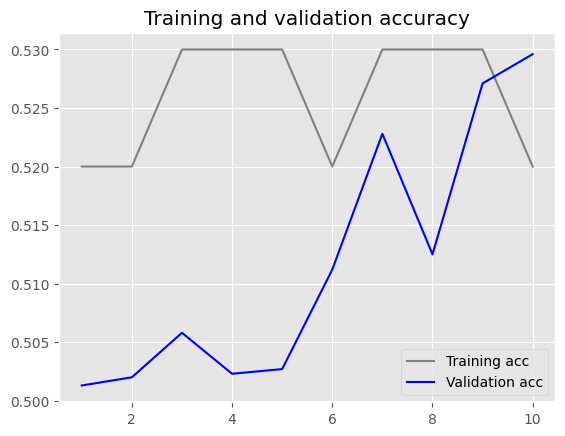

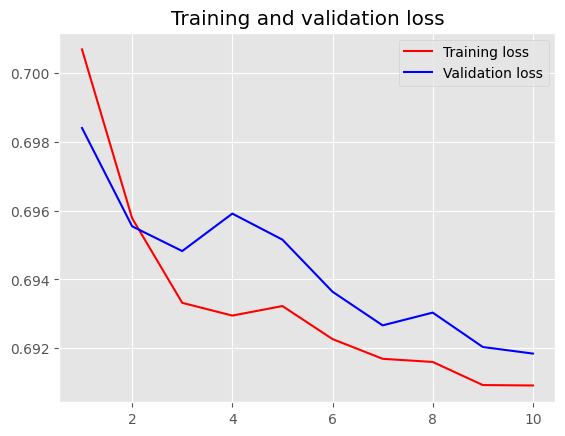

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4932 - loss: 0.6943
Test loss: 0.694303035736084
Test accuracy: 0.49191999435424805


pretrained word embedding layer with training sample size = 5000

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Build the model explicitly by specifying an input shape
model11.build(input_shape=(None, length2))

# Load pretrained weights
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile and fit the model
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - acc: 0.5698 - loss: 2.1114 - val_acc: 0.5090 - val_loss: 0.6937
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.6640 - loss: 0.5941 - val_acc: 0.5112 - val_loss: 0.7089
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 0.7901 - loss: 0.4610 - val_acc: 0.5012 - val_loss: 0.8680
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.6588 - loss: 0.5145 - val_acc: 0.5218 - val_loss: 0.7278
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - acc: 0.9746 - loss: 0.2301 - val_acc: 0.5023 - val_loss: 1.0856
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - acc: 0.9444 - loss: 0.2016 - val_acc: 0.5095 - val_loss: 0.9466
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 1.0000 - loss: 0.0998 - val_acc: 0.5150 - val_loss: 0.8783
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - acc: 1.0000 - loss: 0.0731 - val_acc: 0.5592 - val_loss: 0.7224
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - acc: 1.0000 - loss: 

In [29]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5011 - loss: 0.7989
Test loss: 0.7979297041893005
Test accuracy: 0.5052000284194946


pretrained word embedding layer with training sample size = 1000

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
# Force the embedding layer to build its weights by calling build()
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - acc: 0.8146 - loss: 0.7210 - val_acc: 0.5036 - val_loss: 1.6796
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - acc: 0.9691 - loss: 0.0726 - val_acc: 0.5476 - val_loss: 0.8390
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 1.0000 - loss: 0.0114 - val_acc: 0.5501 - val_loss: 0.8185
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 1.0000 - loss: 0.0081 - val_acc: 0.5556 - val_loss: 0.8088
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - acc: 1.0000 - loss: 0.0064 - val_acc: 0.5526 - val_loss: 0.8216
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 1.0000 - loss: 0.0062 - val_acc: 0.5501 - val_loss: 0.8325
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - acc: 1.0000 - loss: 0.0049 - val_acc: 0.5622 - val_loss: 0.7972
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - acc: 1.0000 - loss: 0.0040 - val_acc: 0.5509 - val_loss: 0.8985
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - acc: 1.0000 - loss: 

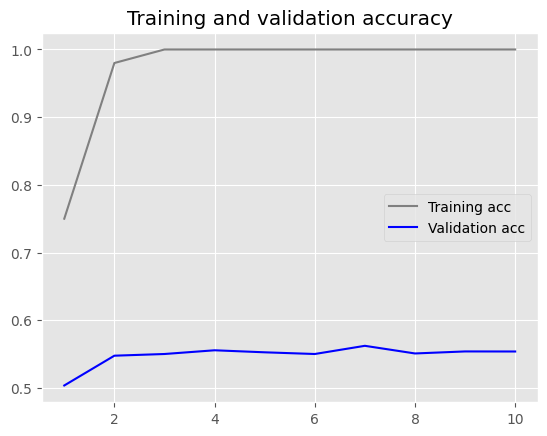

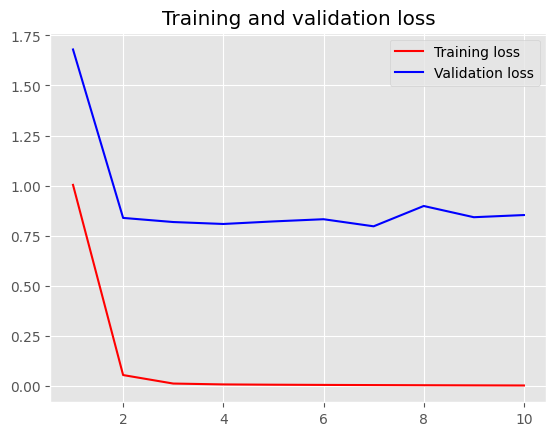

In [33]:
# Build the embedding layer to initialize weights
model11.layers[0].build(input_shape=(None, length2))

# Set the pre-trained embedding matrix as weights for the embedding layer
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile the model
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights with the required file name
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plotting training and validation results
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [34]:
# Evaluate the model
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)

# Print test loss and accuracy
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4966 - loss: 0.9116
Test loss: 0.9093257188796997
Test accuracy: 0.5005199909210205


pretrained word embedding layer with training sample size = 10000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.5469 - loss: 1.4184 - val_acc: 0.5070 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6083 - loss: 0.6809 - val_acc: 0.4938 - val_loss: 0.7917
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6005 - loss: 0.6852 - val_acc: 0.5064 - val_loss: 1.0049
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6907 - loss: 0.6091 - val_acc: 0.4945 - val_loss: 0.8015
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7697 - loss: 0.4636 - val_acc: 0.4944 - val_loss: 0.8367
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8079 - loss: 0.4350 - val_acc: 0.4956 - val_loss: 0.9389
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9246 - loss: 0.2518 - val_acc: 0.4950 - val_loss: 1.0504
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9285 - loss: 0.2264 - val_acc: 0.4996 - val_loss: 0.8540
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9695

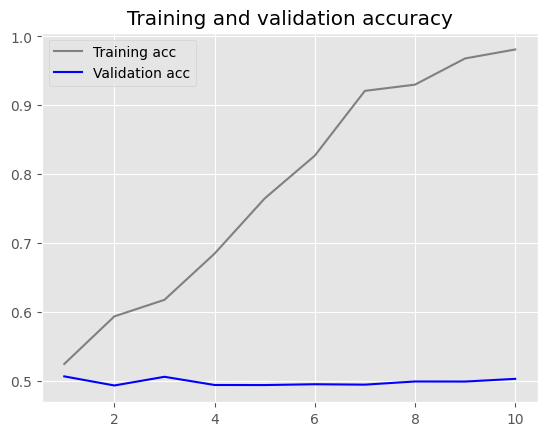

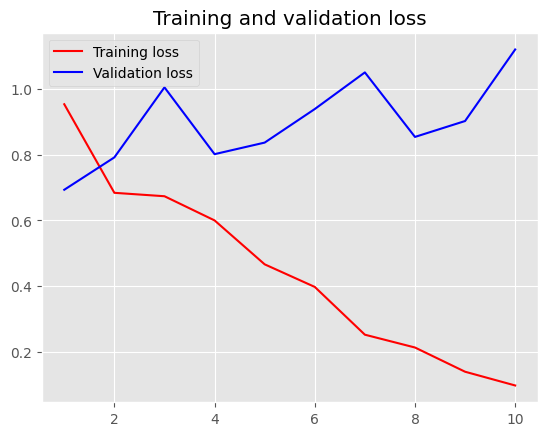

In [42]:

import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector


model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Explicitly build the embedding layer to initialize weights
model12.layers[0].build(input_shape=(None, length))

# Set the pre-trained embedding matrix as weights
model12.layers[0].set_weights([embedd_matrix])
model12.layers[0].trainable = False

# Compile the model
model12.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history12 = model12.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5074 - loss: 1.1244
Test loss: 1.1324992179870605
Test accuracy: 0.504800021648407


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.5022 - loss: 1.1968 - val_acc: 0.5028 - val_loss: 0.9187
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5833 - loss: 0.7097 - val_acc: 0.4987 - val_loss: 0.7311
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6619 - loss: 0.6148 - val_acc: 0.5009 - val_loss: 0.7181
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7261 - loss: 0.5486 - val_acc: 0.4930 - val_loss: 1.0133
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7315 - loss: 0.5408 - val_acc: 0.4937 - val_loss: 0.9643
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8064 - loss: 0.4223 - val_acc: 0.4982 - val_loss: 0.9615
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8455 - loss: 0.3651 - val_acc: 0.4981 - val_loss: 1.0655
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8763 - loss: 0.2930 - val_acc: 0.4925 - val_loss: 1.1334
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

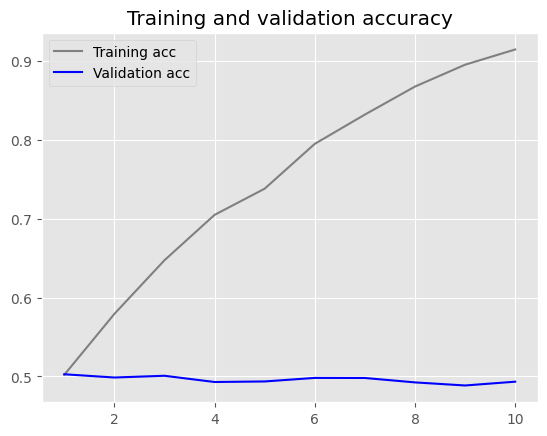

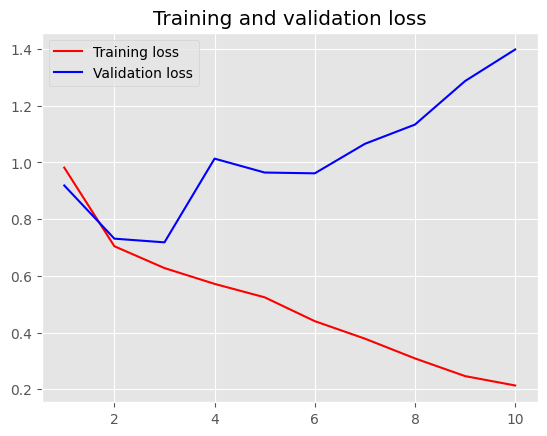

In [48]:
model13 = Sequential()
model13.add(Embedding(words, embedd_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

# Build and set the embedding matrix
model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedd_matrix])
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Train the model
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Save weights
model13.save_weights('pre_trained_glove_model.weights.h5')

# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [49]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5047 - loss: 1.3500
Test loss: 1.3606969118118286
Test accuracy: 0.501479983329773
